# [SSC] Plotting reference from SEM2DPACK and $se2dr$'s processed file for a tilted geometry
by JN Hayek (Created on 09.09.2020)



In [1]:
import os, sys, math, time

from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_ProfilePlotting import *
from Lib_ProfileProcessing import *


#=================== Plotting style ===================
plt.style.use('seaborn-whitegrid')

from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec

#definition of colormap
viridisBig = cm.get_cmap('viridis', 512)
cmap = ListedColormap(viridisBig(np.linspace(0, 1., 256)))

In [2]:
# Timestamp variable
start_time = time.time()

In [3]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

In [4]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"

# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [5]:
def PlotTimeProfileSet(ax, Set,SlipSlipRate, Filtered = False, absolute = False, **kwargs):
    UnitsDict = {"Slip" : "Slip [m]", "SlipRate" : "Slip Rate [m/s]"}    
    OrdinateVariableList=[]
    for idx,item in enumerate(Set[:-1]):
        print(item.Coord)
        if (SlipSlipRate == "Slip"):
            OrdinateVariableList.append([a for a in item.DispX]) 
        elif (SlipSlipRate == "SlipRate"):
            OrdinateVariableList.append([a for a in item.VelX])

        if (Filtered):
            OrdinateVariableList[idx] = [a for a in Butterworth(OrdinateVariableList[idx])]

        if (absolute):
            OrdinateVariableList[idx] = [abs(a) for a in OrdinateVariableList[idx]]

    for idx,item in enumerate(Set[:-1]):
        ax.plot(item.Time, OrdinateVariableList[idx], c = cmap((idx)/len(Set[:-1])), zorder = idx + 2, **kwargs)


def PlotSetOfFiles(ax, ListOfFiles, SlipSlipRate, Filtered=True,**kwargs):
    
    for iidx,SingleFile in enumerate(ListOfFiles):
        head, tail = os.path.split(SingleFile)
        File = LoadPickleFile(Filename = tail,FolderPath = head+"/")
        
        PlotTimeProfileSet(ax, File, SlipSlipRate, Filtered, **kwargs )    
    return ax


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,7)
        ax.set_ylim(-0.5,7)
        
    Lines = fig.axes[-1].get_lines()[-5:]
    
    legend2 = fig.axes[-1].legend(Lines, ['Reference', '8km','6km', '4km', '2km'], loc=1)
    fig.axes[-1].add_artist(legend2)

def GenericFigAxis():
    fig = plt.figure(constrained_layout=True, figsize=[12,4])
    gs = GridSpec(1, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]

# Plots for the tilted case

The output of the data extraction program is the velocity components parallel (x) and perpendicular (y) to the fault geometry at a station located along the fault.

# 45 degrees

/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200914/100dx-3p-100.01delta_A/TPList_t8000_d100.01.pickle
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]


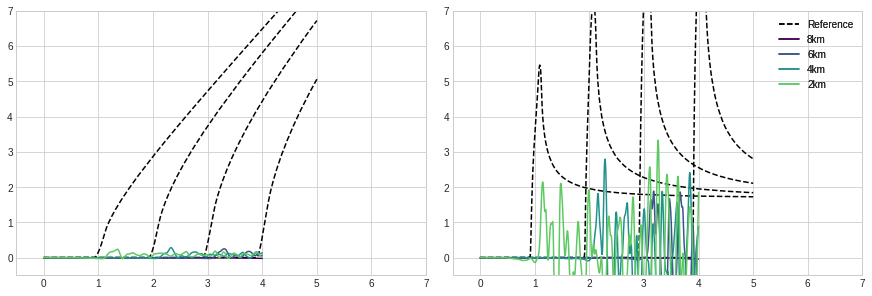

In [6]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200914/"
ListOfFolders = sorted(glob(path+"*/*.pickle"))[:1]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)

# 90 Degrees

/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200914/100dx-3p-100.01delta_C/TPList_t4000_d100.01.pickle
[-100.00999999999952, 8000.0]
[-100.00999999999964, 6000.0]
[-100.00999999999976, 4000.0]
[-100.00999999999988, 2000.0]
[-100.00999999999952, 8000.0]
[-100.00999999999964, 6000.0]
[-100.00999999999976, 4000.0]
[-100.00999999999988, 2000.0]


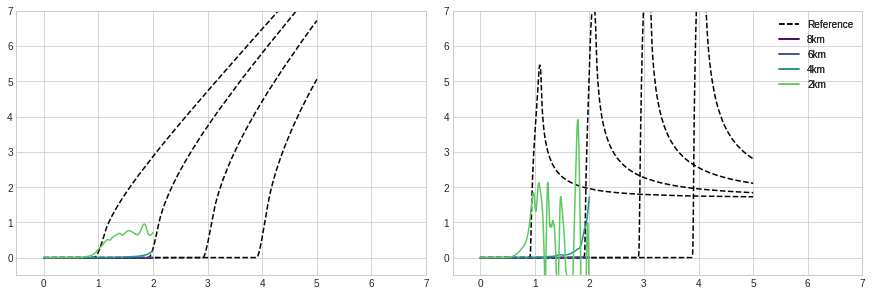

In [7]:
ListOfFolders = sorted(glob(path+"*/*.pickle"))[1:2]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)

/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200914/100dx-3p-100.01delta_C/TPList_t4000_d100.01.pickle
[-100.00999999999952, 8000.0]
[-100.00999999999964, 6000.0]
[-100.00999999999976, 4000.0]
[-100.00999999999988, 2000.0]
[-100.00999999999952, 8000.0]
[-100.00999999999964, 6000.0]
[-100.00999999999976, 4000.0]
[-100.00999999999988, 2000.0]


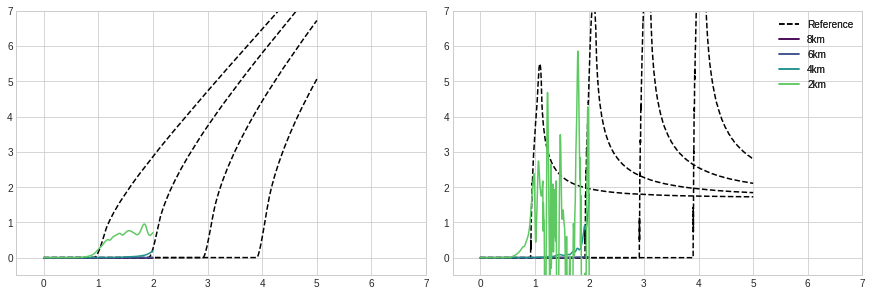

In [8]:
ListOfFolders = sorted(glob(path+"*/*.pickle"))[1:2]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=False)

format_axes(fig)

# Deg 10

/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200914/100dx-3p-100.01delta_D/TPList_t4000_d100.01.pickle
[7861.095469849194, 1487.6760447141937]
[5891.479963824779, 1140.379689380333]
[3921.8644578003623, 793.0833340464723]
[1952.2489517759461, 445.7869787126116]
[7861.095469849194, 1487.6760447141937]
[5891.479963824779, 1140.379689380333]
[3921.8644578003623, 793.0833340464723]
[1952.2489517759461, 445.7869787126116]


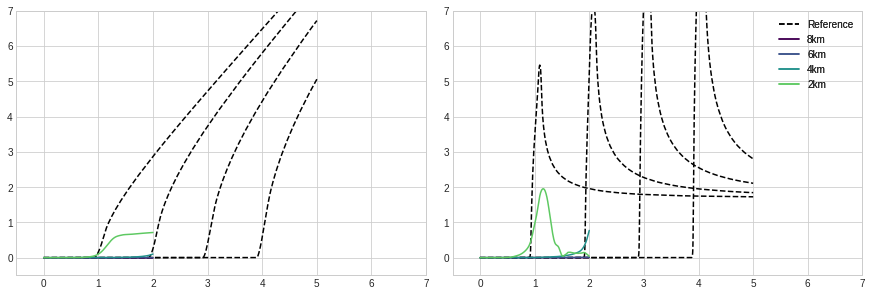

In [9]:
ListOfFolders = sorted(glob(path+"*/*.pickle"))[2:3]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)

/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200914/100dx-3p-100.01delta_E/TPList_t4000_d100.01.pickle
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]


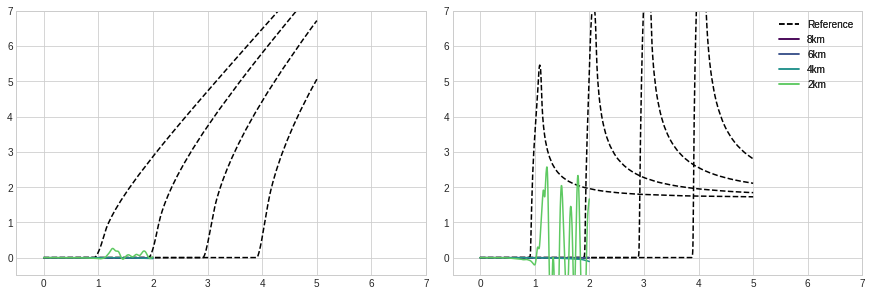

In [10]:
ListOfFolders = sorted(glob(path+"*/*.pickle"))[3:]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)

/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200915/100dx-3p-100.01delta_Zero/TPList_t4000_d100.01.pickle
[8000.0, 100.01]
[6000.0, 100.01]
[4000.0, 100.01]
[2000.0, 100.01]
[8000.0, 100.01]
[6000.0, 100.01]
[4000.0, 100.01]
[2000.0, 100.01]


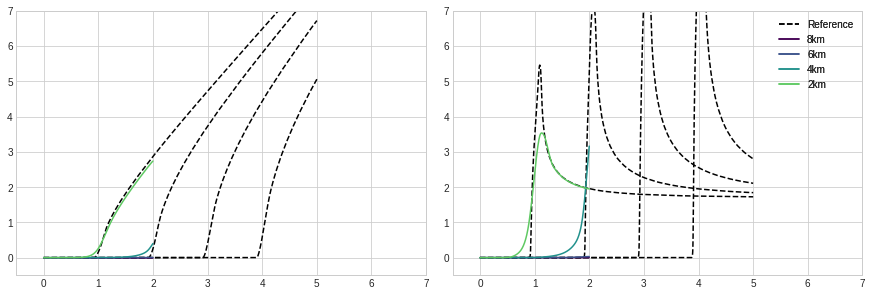

In [11]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200915/"
ListOfFolders = sorted(glob(path+"*/*.pickle"))
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)

In [12]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,7)
        ax.set_ylim(-7,7)
    axis[0].set_ylabel("Slip [m]")
    axis[0].set_xlabel("Time [s]")
    
    axis[1].set_ylabel("Slip Rate [m/s]")
    axis[0].set_xlabel("Time [s]")
    
    Lines = fig.axes[-1].get_lines()[-5:]
    
    legend2 = fig.axes[-1].legend(Lines, ['Reference', '8km','6km', '4km', '2km'], loc=1)
    fig.axes[-1].add_artist(legend2)

/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200917/100dx-3p-100.01delta_B/TPList_t8000_d100.01.pickle
[-100.00999999999952, 8000.0]
[-100.00999999999964, 6000.0]
[-100.00999999999976, 4000.0]
[-100.00999999999988, 2000.0]
[-100.00999999999952, 8000.0]
[-100.00999999999964, 6000.0]
[-100.00999999999976, 4000.0]
[-100.00999999999988, 2000.0]


Text(0.5, 0.98, 'Tilting at 90°: 100x100m mesh, 100.01$\\delta$, p:3, dt: 5e-4s')

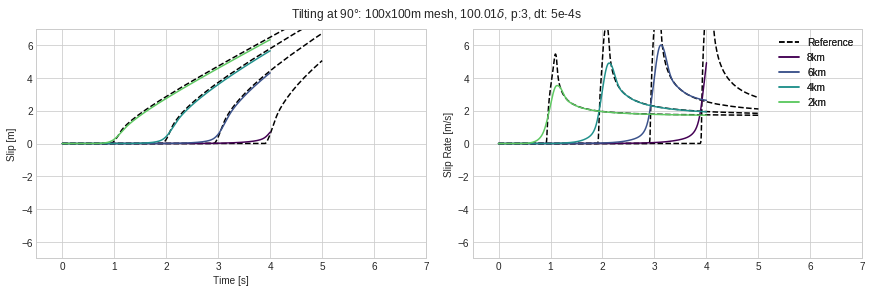

In [13]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200917/"
ListOfFolders = sorted(glob(path+"*/*.pickle"))[:1]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)
fig.suptitle('Tilting at 90°: 100x100m mesh, 100.01$\delta$, p:3, dt: 5e-4s', fontsize=12)


/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200917/100dx-3p-100.01delta_C/TPList_t8000_d100.01.pickle
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]


Text(0.5, 0.98, 'Tilting at 45°: 100x100m mesh, 100.01$\\delta$, p:3, dt: 5e-4s')

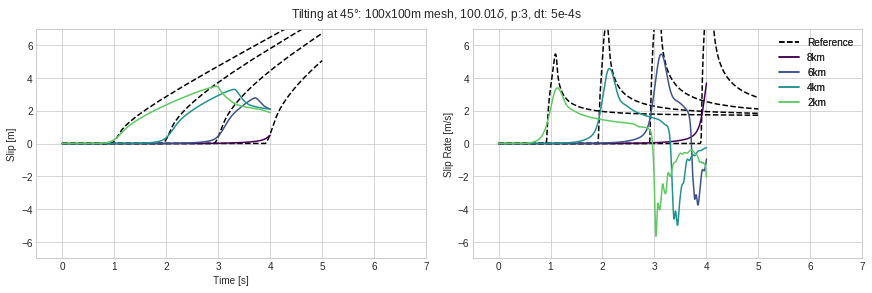

In [14]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200917/"
ListOfFolders = sorted(glob(path+"*/*.pickle"))[1:]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)
fig.suptitle('Tilting at 45°: 100x100m mesh, 100.01$\delta$, p:3, dt: 5e-4s', fontsize=12)


/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200918/100dx-3p-100.01delta_Fix/TPList_t8000_d100.01.pickle
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]
[5586.136500305914, 5727.571998678846]
[4171.922937932819, 4313.358436305752]
[2757.7093755597234, 2899.1448739326565]
[1343.4958131866285, 1484.9313115595614]


Text(0.5, 0.98, 'Tilting at 45°: 100x100m mesh, 100.01$\\delta$, p:3, dt: 5e-4s')

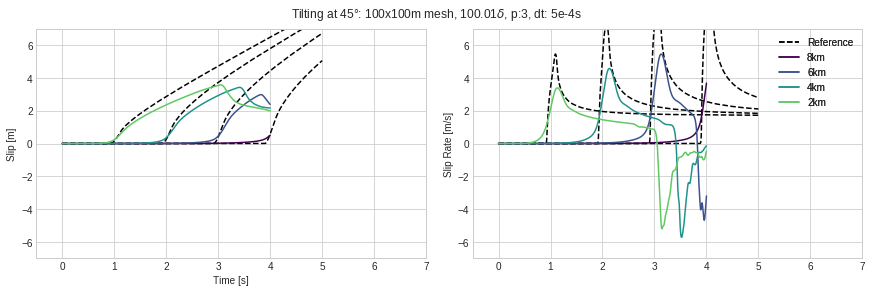

In [15]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200918/"
ListOfFolders = sorted(glob(path+"*/*.pickle"))[:1]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)
fig.suptitle('Tilting at 45°: 100x100m mesh, 100.01$\delta$, p:3, dt: 5e-4s', fontsize=12)


/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200918/50dx-3p-50.005delta/TPList_t5400_d50.005.pickle
[5621.4953748991475, 5692.213124085612]
[4207.281812526053, 4277.999561712518]
[2793.068250152957, 2863.785999339423]
[1378.8546877798617, 1449.5724369663283]
[5621.4953748991475, 5692.213124085612]
[4207.281812526053, 4277.999561712518]
[2793.068250152957, 2863.785999339423]
[1378.8546877798617, 1449.5724369663283]


Text(0.5, 0.98, 'Tilting at 45°: 50x50m mesh, 50.005$\\delta$, p:3, dt: 5e-4s')

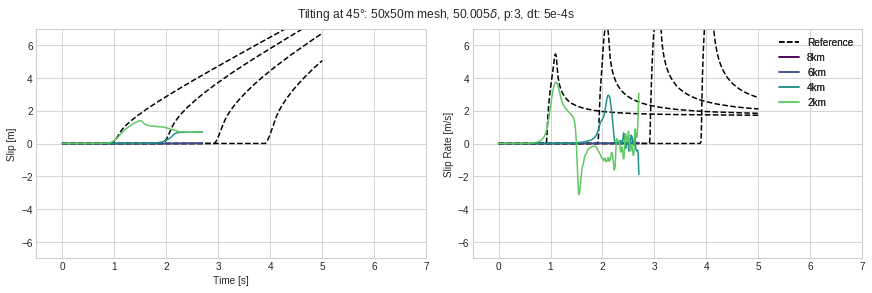

In [16]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200918/"
ListOfFolders = sorted(glob(path+"*/*.pickle"))[1:]
[print(A) for A in ListOfFolders]

fig, axis = GenericFigAxis()


if ListOfFolders != []:
    [item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[0],ListOfFolders,"Slip")

if ListOfFolders != []:
    [item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]
    PlotSetOfFiles(axis[1],ListOfFolders,"SlipRate",Filtered=True)

format_axes(fig)
fig.suptitle('Tilting at 45°: 50x50m mesh, 50.005$\delta$, p:3, dt: 5e-4s', fontsize=12)
